In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline

In [2]:
#Stats Canada Provides Demographic data based on total infections between demographics 
#and hospitalizations rates so pulling all this data.

TotalCases = os.path.join("Resources/Total Cases.csv")
Demographic_Data = os.path.join("Resources/Demographic Data.csv")
Demographic_Data_Deceased = os.path.join("Resources/Demographic Data for deceased.csv")
Demographic_Data_Hospitalized = os.path.join("Resources/Demographic Data for Hospitalization.csv")
Demographic_Data_ICU = os.path.join("Resources/Demographic Data Admited ICU.csv")

Total_Cases = pd.read_csv(TotalCases)
Infection_Demo = pd.read_csv(Demographic_Data, thousands=',')
Deceased_Demo = pd.read_csv(Demographic_Data_Deceased, thousands=',')
Hospitalized_Demo = pd.read_csv(Demographic_Data_Hospitalized, thousands=',')
ICU_Demo = pd.read_csv(Demographic_Data_ICU)

ICU_Demo


,Age group (years),Number of cases with case reports (proportion),Number of male cases (ICU),Number of female cases (ICU),Number of other cases (ICU)
0,0-19,47,26,21,0
1,20-29,106,47,59,0
2,30-39,162,93,69,0
3,40-49,312,196,116,0
4,50-59,664,438,226,0
5,60-69,871,588,283,0
6,70-79,836,542,294,0
7,80+,461,236,225,0


In [3]:
Merge_1 = pd.merge(Infection_Demo,Deceased_Demo,how="right", on=["Age group (years)"])
Merge_2 = pd.merge(Merge_1,Hospitalized_Demo,how="right", on=["Age group (years)"])
All_data = pd.merge(Merge_2,ICU_Demo,how="right", on=["Age group (years)"])

All_data

,Age group (years),Number of cases with case reports (proportion)_x,Number of male cases (proportion),Number of female cases (proportion),Number of other cases (proportion),Number of cases with case reports (proportion)_y,Number of male cases (Deceased),Number of female cases (Deceased),Number of other cases (Deceased),Number of cases with case reports (proportion)_x,Number of male cases (Hospitalized),Number of female cases (Hospitalized),Number of other cases (Hospitalized),Number of cases with case reports (proportion)_y,Number of male cases (ICU),Number of female cases (ICU),Number of other cases (ICU)
0,0-19,30324,15232,15035,2,2,1,1,0,229,112,117,0,47,26,21,0
1,20-29,43033,21142,21784,4,10,7,3,0,485,195,290,0,106,47,59,0
2,30-39,35471,17283,18108,2,17,11,6,0,778,371,407,0,162,93,69,0
3,40-49,33687,15620,17988,3,62,42,20,0,1203,686,517,0,312,196,116,0
4,50-59,31502,14872,16582,2,243,139,104,0,2149,1310,838,1,664,438,226,0
5,60-69,19848,10193,9628,1,735,457,278,0,2727,1659,1068,0,871,588,283,0
6,70-79,12820,6373,6424,1,1843,1074,769,0,3376,1877,1499,0,836,542,294,0
7,80+,23731,7668,15973,0,7128,2914,4214,0,5531,2341,3190,0,461,236,225,0


In [4]:
All_data = All_data.rename(columns={"Number of male cases (proportion)": "Male Cases",
                                    "Number of female cases (proportion)":"Female Cases",
                                    "Number of male cases (Deceased)": "Male Deaths",
                                    "Number of female cases (Deceased)": "Female Deaths",
                                    "Number of male cases (Hospitalized)": "Male Hospitlization",
                                    "Number of female cases (Hospitalized)": "Female Hospitalization",
                                    "Number of male cases (ICU)": "Male Admitted to ICU",
                                    "Number of female cases (ICU)": "Female Admitted to ICU"})
All_data

,Age group (years),Number of cases with case reports (proportion)_x,Male Cases,Female Cases,Number of other cases (proportion),Number of cases with case reports (proportion)_y,Male Deaths,Female Deaths,Number of other cases (Deceased),Number of cases with case reports (proportion)_x,Male Hospitlization,Female Hospitalization,Number of other cases (Hospitalized),Number of cases with case reports (proportion)_y,Male Admitted to ICU,Female Admitted to ICU,Number of other cases (ICU)
0,0-19,30324,15232,15035,2,2,1,1,0,229,112,117,0,47,26,21,0
1,20-29,43033,21142,21784,4,10,7,3,0,485,195,290,0,106,47,59,0
2,30-39,35471,17283,18108,2,17,11,6,0,778,371,407,0,162,93,69,0
3,40-49,33687,15620,17988,3,62,42,20,0,1203,686,517,0,312,196,116,0
4,50-59,31502,14872,16582,2,243,139,104,0,2149,1310,838,1,664,438,226,0
5,60-69,19848,10193,9628,1,735,457,278,0,2727,1659,1068,0,871,588,283,0
6,70-79,12820,6373,6424,1,1843,1074,769,0,3376,1877,1499,0,836,542,294,0
7,80+,23731,7668,15973,0,7128,2914,4214,0,5531,2341,3190,0,461,236,225,0


In [5]:
Demographic_Data = All_data[["Age group (years)","Male Cases", "Female Cases", "Male Hospitlization", "Female Hospitalization",
                                 "Male Admitted to ICU","Female Admitted to ICU","Male Deaths","Female Deaths"]]
Demographic_Data


,Age group (years),Male Cases,Female Cases,Male Hospitlization,Female Hospitalization,Male Admitted to ICU,Female Admitted to ICU,Male Deaths,Female Deaths
0,0-19,15232,15035,112,117,26,21,1,1
1,20-29,21142,21784,195,290,47,59,7,3
2,30-39,17283,18108,371,407,93,69,11,6
3,40-49,15620,17988,686,517,196,116,42,20
4,50-59,14872,16582,1310,838,438,226,139,104
5,60-69,10193,9628,1659,1068,588,283,457,278
6,70-79,6373,6424,1877,1499,542,294,1074,769
7,80+,7668,15973,2341,3190,236,225,2914,4214


In [6]:
Demographic_Data[['Age group (years)', "Male Cases", "Female Cases"]]


,Age group (years),Male Cases,Female Cases
0,0-19,15232,15035
1,20-29,21142,21784
2,30-39,17283,18108
3,40-49,15620,17988
4,50-59,14872,16582
5,60-69,10193,9628
6,70-79,6373,6424
7,80+,7668,15973


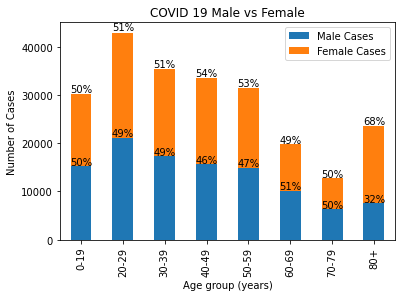

<Figure size 432x288 with 0 Axes>

In [7]:
# ax = result_pct.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None


test = Demographic_Data[['Age group (years)', "Male Cases", "Female Cases"]]
ax = test.plot(kind='bar', stacked=True, x='Age group (years)')

plt.title("COVID 19 Male vs Female")

plt.xlabel("Age group (years)")
plt.ylabel("Number of Cases")

i = 0

df_count = len(test['Male Cases'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    
    percent = height/(test["Male Cases"][i % df_count] + test["Female Cases"][i % df_count])
    
    x, y = p.get_xy() 
    
    ax.annotate(f'{percent:.0%}', (x + width/2, y + height*1.02), ha='center')
    i += 1

plt.show()
plt.tight_layout()
plt.savefig('Output/Demographic_Cases.png')

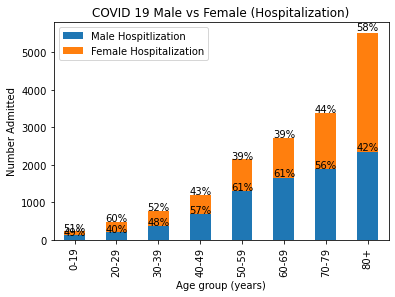

<Figure size 432x288 with 0 Axes>

In [8]:
Demographic_Data[['Age group (years)', "Male Hospitlization", "Female Hospitalization"]]

test_H = Demographic_Data[['Age group (years)', "Male Hospitlization", "Female Hospitalization"]]

ax = test_H.plot(kind='bar', stacked=True, x='Age group (years)')

plt.title("COVID 19 Male vs Female (Hospitalization)")

plt.xlabel("Age group (years)")
plt.ylabel("Number Admitted")

k = 0

df_count1 = len(test_H['Male Hospitlization'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()

    percent_1 = height/(test_H["Male Hospitlization"][k % df_count1] + test_H["Female Hospitalization"][k % df_count1])
    
    x, y = p.get_xy()
    
    ax.annotate(f'{percent_1:.0%}', (x + width/2, y + height*1.02), ha='center')
    k += 1
    
    
plt.show()
plt.tight_layout()   
plt.savefig('Output/Demographic_Hospitalization.png')

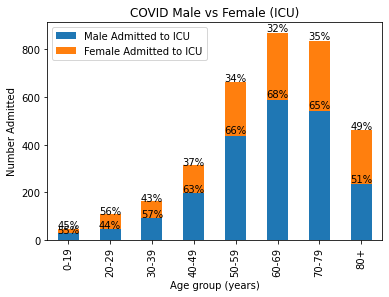

<Figure size 432x288 with 0 Axes>

In [9]:
Demographic_Data[['Age group (years)', "Male Admitted to ICU", "Female Admitted to ICU"]]
test_ICU = Demographic_Data[['Age group (years)', "Male Admitted to ICU", "Female Admitted to ICU"]]

ax = test_ICU.plot(kind='bar', stacked=True, x='Age group (years)')

plt.title("COVID Male vs Female (ICU)")
plt.xlabel("Age group (years)")
plt.ylabel("Number Admitted")


L = 0

df_count2 = len(test_ICU['Male Admitted to ICU'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()

    percent_2 = height/(test_ICU["Male Admitted to ICU"][L % df_count2] + test_ICU["Female Admitted to ICU"][L % df_count2])
    
    x, y = p.get_xy()
    
    ax.annotate(f'{percent_2:.0%}', (x + width/2, y + height*1.02), ha='center')
    L += 1

plt.show()
plt.tight_layout()
plt.savefig('Output/Demographic_ICU.png')

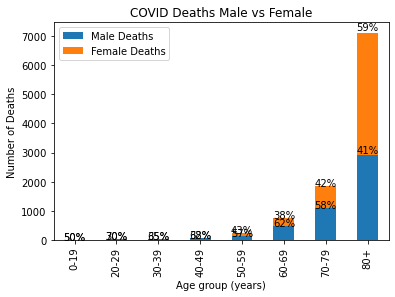

<Figure size 432x288 with 0 Axes>

In [10]:
Demographic_Data[['Age group (years)', "Male Deaths", 'Female Deaths']]
test_deathrate = Demographic_Data[['Age group (years)', "Male Deaths", 'Female Deaths']]
ax = test_deathrate.plot(kind='bar', stacked=True, x='Age group (years)')


plt.title("COVID Deaths Male vs Female")
plt.xlabel("Age group (years)")
plt.ylabel("Number of Deaths")

M = 0

df_count3 = len(test_deathrate['Male Deaths'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()

    percent_3 = height/(test_deathrate["Male Deaths"][M % df_count3] + test_deathrate["Female Deaths"][M % df_count3])
    
    x, y = p.get_xy()
    
    ax.annotate(f'{percent_3:.0%}', (x + width/2, y + height*1.02), ha='center')
    M += 1



plt.show()
plt.tight_layout()
plt.savefig('Output/Demographic_deaths.png')

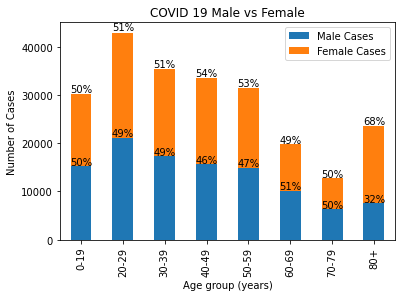

<Figure size 432x288 with 0 Axes>

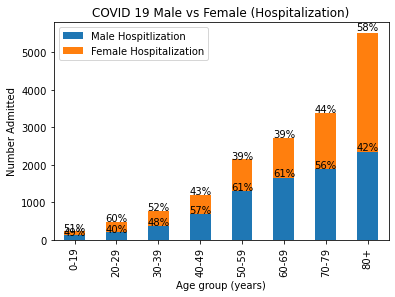

<Figure size 432x288 with 0 Axes>

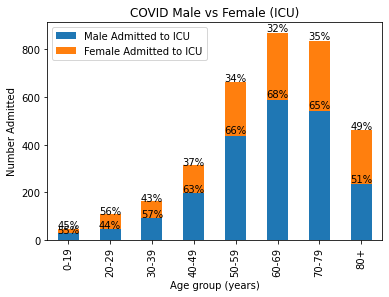

<Figure size 432x288 with 0 Axes>

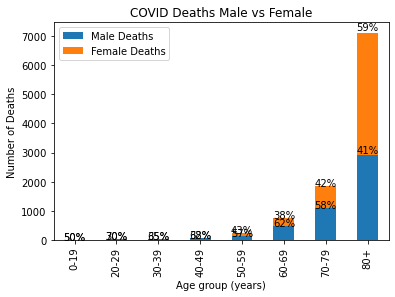

<Figure size 432x288 with 0 Axes>

In [11]:


test = Demographic_Data[['Age group (years)', "Male Cases", "Female Cases"]]
ax = test.plot(kind='bar', stacked=True, x='Age group (years)')

plt.title("COVID 19 Male vs Female")

plt.xlabel("Age group (years)")
plt.ylabel("Number of Cases")

i = 0

df_count = len(test['Male Cases'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    
    percent = height/(test["Male Cases"][i % df_count] + test["Female Cases"][i % df_count])
    
    x, y = p.get_xy() 
    
    ax.annotate(f'{percent:.0%}', (x + width/2, y + height*1.02), ha='center')
    i += 1

plt.show()
plt.tight_layout()



Demographic_Data[['Age group (years)', "Male Hospitlization", "Female Hospitalization"]]

test_H = Demographic_Data[['Age group (years)', "Male Hospitlization", "Female Hospitalization"]]

ax = test_H.plot(kind='bar', stacked=True, x='Age group (years)')

plt.title("COVID 19 Male vs Female (Hospitalization)")

plt.xlabel("Age group (years)")
plt.ylabel("Number Admitted")

k = 0

df_count1 = len(test_H['Male Hospitlization'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()

    percent_1 = height/(test_H["Male Hospitlization"][k % df_count1] + test_H["Female Hospitalization"][k % df_count1])
    
    x, y = p.get_xy()
    
    ax.annotate(f'{percent_1:.0%}', (x + width/2, y + height*1.02), ha='center')
    k += 1
    
    
plt.show()
plt.tight_layout() 


Demographic_Data[['Age group (years)', "Male Admitted to ICU", "Female Admitted to ICU"]]
test_ICU = Demographic_Data[['Age group (years)', "Male Admitted to ICU", "Female Admitted to ICU"]]

ax = test_ICU.plot(kind='bar', stacked=True, x='Age group (years)')

plt.title("COVID Male vs Female (ICU)")
plt.xlabel("Age group (years)")
plt.ylabel("Number Admitted")


L = 0

df_count2 = len(test_ICU['Male Admitted to ICU'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()

    percent_2 = height/(test_ICU["Male Admitted to ICU"][L % df_count2] + test_ICU["Female Admitted to ICU"][L % df_count2])
    
    x, y = p.get_xy()
    
    ax.annotate(f'{percent_2:.0%}', (x + width/2, y + height*1.02), ha='center')
    L += 1

plt.show()
plt.tight_layout()



Demographic_Data[['Age group (years)', "Male Deaths", 'Female Deaths']]
test_deathrate = Demographic_Data[['Age group (years)', "Male Deaths", 'Female Deaths']]
ax = test_deathrate.plot(kind='bar', stacked=True, x='Age group (years)')


plt.title("COVID Deaths Male vs Female")
plt.xlabel("Age group (years)")
plt.ylabel("Number of Deaths")

M = 0

df_count3 = len(test_deathrate['Male Deaths'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()

    percent_3 = height/(test_deathrate["Male Deaths"][M % df_count3] + test_deathrate["Female Deaths"][M % df_count3])
    
    x, y = p.get_xy()
    
    ax.annotate(f'{percent_3:.0%}', (x + width/2, y + height*1.02), ha='center')
    M += 1



plt.show()
plt.tight_layout()
